In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zipfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from skimage import color, io
from scipy.misc import imresize

np.random.seed(133)

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

IMAGE_SIZE = 224

In [2]:
from six.moves import cPickle as pickle
pickle_file = 'catfish.pickle'
try:
    with open(pickle_file) as f:
        save=pickle.load(f)
except Exception as e:
  print('Unable to load data from', pickle_file, ':', e)
  raise
    
train_images_sane=save['train_images_sane']
train_images=save['train_images']
insane_indices=save['insane_indices']
test_images=save['test_images']

def read_image(filepath):
    img = io.imread(filepath)
    new_img = np.array(imresize(img, (IMAGE_SIZE, IMAGE_SIZE), interp='bicubic'))
    return new_img

In [3]:

X_train = np.array([read_image(train_images_sane[i]) for i in xrange(len(train_images_sane))])
Y_train = np.array([int('dog' in train_images_sane[i]) for i in xrange(len(train_images_sane))])

X_train = X_train.astype('float32')
#X_train /= 255

X_verify = np.array([read_image(train_images[i]) for i in insane_indices])
Y_verify = np.array([int('dog' in train_images[i]) for i in insane_indices])

X_verify = X_verify.astype('float32')
#X_verify /= 255

In [3]:
X_test = np.array([read_image(test_images[i]) for i in xrange(len(test_images))])
X_test = X_test.astype('float32')


In [4]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

#X_train, Y_train = randomize(X_train, Y_train)
#X_verify, Y_verify = randomize(X_verify, Y_verify)


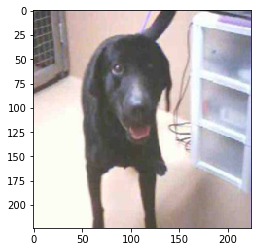

1


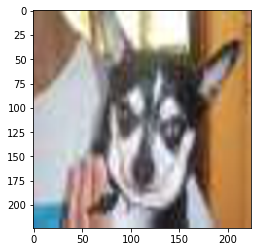

1


In [5]:
random_image=np.random.choice(len(train_images_sane))
plt.imshow(X_train[random_image]/255)
plt.show()
print(Y_train[random_image])

random_image=np.random.choice(len(insane_indices))
plt.imshow(X_verify[random_image]/255)
plt.show()
print(Y_verify[random_image])

In [6]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

preprocess_input(X_train)
train_preds=model.predict(X_train, verbose=1)
#train_preds_decoded=decode_predictions(train_preds, top=3)

pickle_file = 'ResNet50_train_preds.pickle'

try:
  f = open(pickle_file, 'wb')
  pickle.dump(train_preds, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Using TensorFlow backend.


23814/23814 [==============================] - 156s     

In [4]:

preprocess_input(X_test)
train_preds=model.predict(X_test, verbose=1)
#train_preds_decoded=decode_predictions(train_preds, top=3)

pickle_file = 'ResNet50_test_preds.pickle'

try:
  f = open(pickle_file, 'wb')
  pickle.dump(train_preds, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Using TensorFlow backend.


12500/12500 [==============================] - 85s      

In [8]:

preprocess_input(X_verify)
train_preds=model.predict(X_verify, verbose=1)
#train_preds_decoded=decode_predictions(train_preds, top=3)

pickle_file = 'ResNet50_verify_preds.pickle'

try:
  f = open(pickle_file, 'wb')
  pickle.dump(train_preds, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

1186/1186 [==============================] - 8s      

In [1]:
random_image=2# =np.random.choice(len(train_images_sane))

plt.imshow(X_train[random_image]/255)
plt.show()

#img_path = train_images_sane[random_image]
#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
x = X_train[random_image]
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

plt.imshow(x[0])
plt.show()

#print (x.shape)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

NameError: name 'plt' is not defined

In [8]:
x = image.img_to_array(img)
print (x.shape)
X_train[random_image].shape
type(x[0,0,0])


(224, 224, 3)


numpy.float32

In [27]:
import sys
sys.path.append("keras-squeezenet")

from squeezenet import get_squeezenet

squeezenet_model = get_squeezenet(1000, dim_ordering='tf')
squeezenet_model.compile(loss="categorical_crossentropy", optimizer="adam")
squeezenet_model.load_weights('keras-squeezenet/model/squeezenet_weights_tf_dim_ordering_tf_kernels.h5', by_name=True)

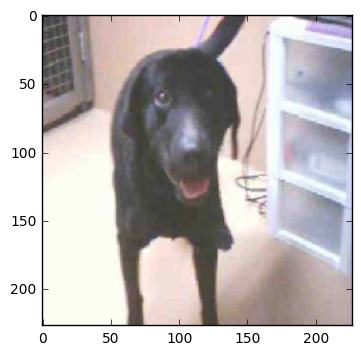

(1, 227, 227, 3)


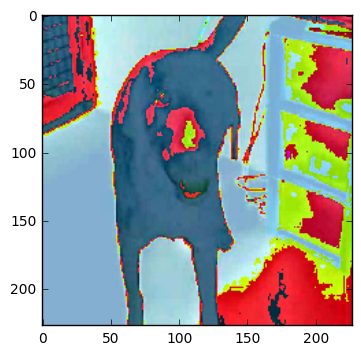

Predicted: [(u'n02099429', u'curly-coated_retriever', 0.43104142), (u'n02099267', u'flat-coated_retriever', 0.33356109), (u'n02099712', u'Labrador_retriever', 0.12444313)]


In [48]:
from scipy import misc
# read and prepare image input
im = misc.imread('keras-squeezenet/images/cat.jpeg')
im = misc.imresize(im, (227, 227)).astype(np.float32)

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

random_image=np.random.choice(len(train_images_sane))

img_path = train_images_sane[random_image]
img = image.load_img(img_path, target_size=(227, 227))
img= imresize(img, (IMAGE_SIZE, IMAGE_SIZE), interp='bicubic')
x = image.img_to_array(img)
plt.imshow(x/255)
plt.show()
#x = X_train[random_image]
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print (x.shape)

plt.imshow(x[0])
plt.show()


res = squeezenet_model.predict(x)
print('Predicted:', decode_predictions(res, top=3)[0])


In [ ]:
# just get te dogs and cat labels

#train_preds=model.predict(X_train, verbose=1)
#print(X_test)

train_preds_


In [63]:
train_preds_decoded=decode_predictions(train_preds, top=3)
train_preds_decoded

NameError: name 'train_preds' is not defined